In [1]:
#                DEPENDENCIES                #

#Installing necessary libraries 

import numpy as np
from numpy import exp
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

#Default graphs size

plt.rcParams["figure.figsize"] = (11, 5)

### **Question 1**



Question 1 a) + b) Non covid economy 

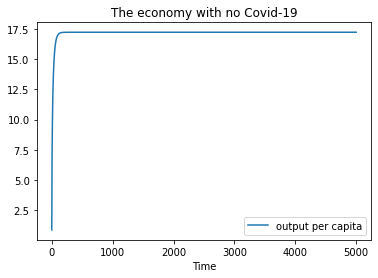

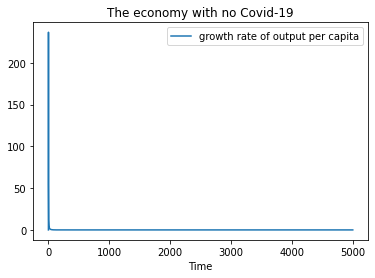

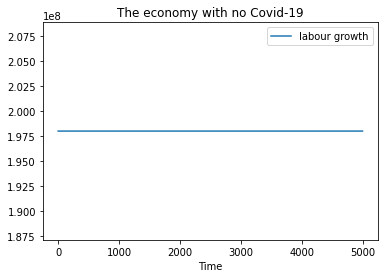

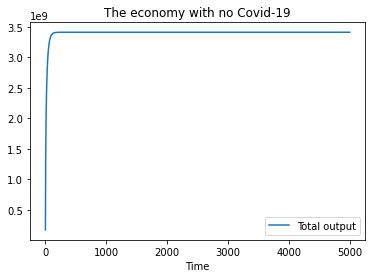

In [17]:
#given for this specific question: Reminder that the data structure is arrays! 

# Y = K**α(hL)**1−α: production function giving the output 
# Output per capita: Y/L = (K**α(hL)**1−α)/L, let this be called 'y'
# popsize = 330000000
# labour force = 60% of pop size and is fixed in the non covid model 
# Capital accumulation: k= s*Y+(1-delta)K0


h = 8
alpha = 0.3
delta = 0.05
s = 0.3

# defining variables over time 
final = 5000

K = [900000]*(final)
L= [198000000]*(final)
time = [0]*(final)
y = [0]*(final)
Y = [0]*(final)
growth = [0]*(final)   #can start from 0 too 


Y[0]= (K[0]**alpha)*(h*L[0])**(1-alpha)    #total output = production function 
y[0]= ((K[0]**alpha)*(h*L[0])**(1-alpha))/L[0]   #output per capita 

#calculating and plotting Y per capita: 

for t in range (1, final):
  time[t]= t
  K[t]= s*(K[t-1]**alpha)*(h*L[t])**(1-alpha) + (1-delta)*K[t-1]   
  Y[t] = (K[t]**alpha)*(h*L[t])**(1-alpha) 
  y[t] = ((K[t]**alpha)*(h*L[t])**(1-alpha))/L[t]  #per capita y
  growth[t] = (y[t]/y[t-1] - 1)*100

#plotting output per capita

plt.figure()
plt.plot(time, y, label='output per capita')
plt.title("The economy with no Covid-19")
plt.xlabel("Time")
plt.legend()
plt.show()

#plotting growth of output per capita

plt.figure()
plt.plot(time, growth, label ='growth rate of output per capita')
plt.title("The economy with no Covid-19")
plt.xlabel("Time")
plt.legend()
plt.show()


#plotting labour force to show that it is constant
plt.figure()
plt.plot(time, L, label='labour growth')
plt.title("The economy with no Covid-19")
plt.xlabel("Time")
plt.legend()
plt.show()

#plotting total output just for comparison
plt.figure()
plt.plot(time, Y, label='Total output')
plt.title("The economy with no Covid-19")
plt.xlabel("Time")
plt.legend()
plt.show()





Question 1. c)


> Answer: Half the population will be hit by Covid-19 around approx 80 - 100 days days when the c-path is 50%






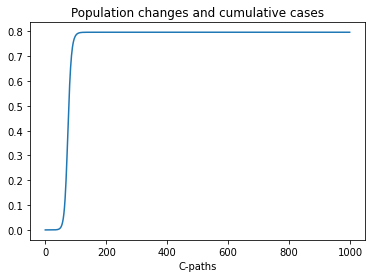

In [78]:
#            INITIALIZATION              #

#Parameters
popsize = 330000000
gamma= 1/18
sigma=1/5.2

# time
t_length = 5000   #in days (i don't know why it's assumed to be in days during classes)
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)


#    FUNCTIONS   #: 
#F:

def F(x, t, R0=2):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * gamma if callable(R0) else R0 * gamma 
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - sigma * e
    di = sigma * e - gamma * i

    return ds, de, di

#Initial conditions of s,e,i
i_0 = 1/10000000
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0   # in vector format 

#       FUNCTION       #
#Solving for paths 
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    #G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(F, x_init, t_vec, args = (R0,)).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return s_path, e_path, i_path, c_path


#plotting and checking time
R0_vals = [2]  # All transimission rates considered
labels = [f'$R_0 = {r:.2f}$' for r in R0_vals] # Corresponding labels
s_paths, e_paths, i_paths, c_paths = [], [], [], [] # Paths generated from these transimission rates

for r in R0_vals:
    s_path, e_path, i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    s_paths.append(s_path)
    e_paths.append(e_path)
    c_paths.append(c_path)

#          FUNCTION          #
#Plotting: 
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left', frameon = False)

    plt.show()


#finding out 50% infection rate population days#

for t in (0, t_length):
  if c_paths[t] >= 0.5:
    print("50% of the population infected with COVID-19 in these days =", t)

plt.figure()
plt.plot(c_path)
plt.title("Population changes and cumulative cases")
plt.xlabel("C-paths")
plt.show()



Question 1. d)


> Answer:

s-path = 

i-path =

e-path =  





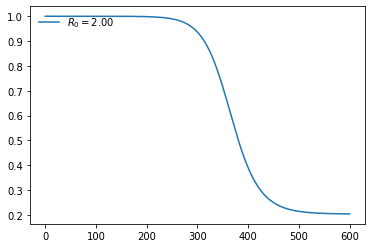

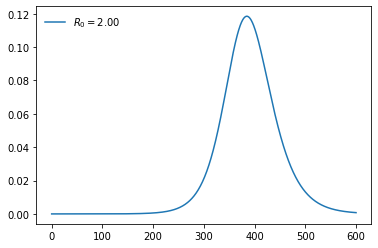

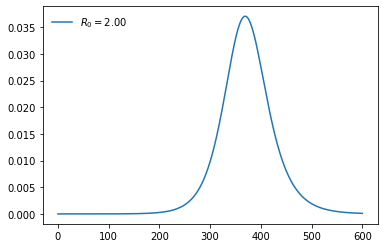

In [ ]:
#plots of other paths

plot_paths(s_paths, labels)
plot_paths(i_paths, labels)
plot_paths(e_paths, labels)



Question 1. e).a) + b)


> Answer:


1.   The contraction of output per capita the largest at around 75 - 90 days
2.   The easy days may include the days before '50 days' period of time where the output still grows and perhaps after the recovery when the output stabilize again. 50 days after Covid-19 hit the economy, the economy is going to suffer the most and recover later on nearing after 200 days where the output per capita seems constant again. 



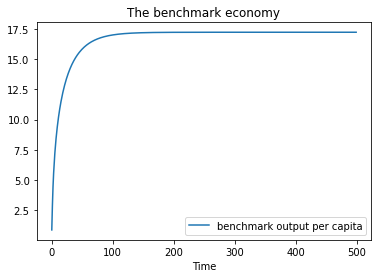

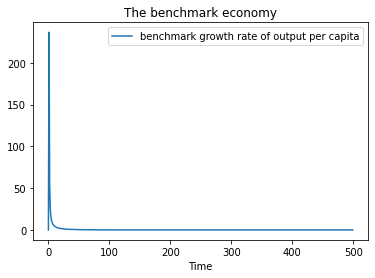

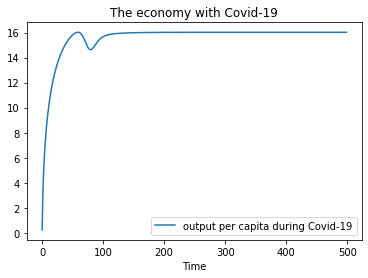

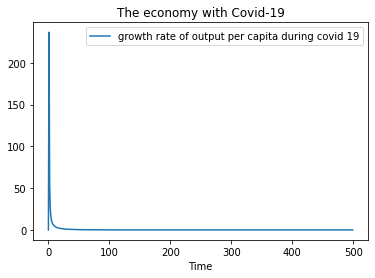

In [67]:
#Cumulative cases = infected + removed 
#Removed cases = recovered + dead
#Removed/recovered = cumulative - infected 
#Infected = susceptible + exposed 
#c = r + i
#r = 1 - s - e - i
#c = 1 - s - e
#i = c - r
#in here we need: s, e, r
#formulae = s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1])
#this formulae will be in the capital accumulation and it defined as z below 
 

h=8
s_h= 8   #susceptibles
e_h=6     #exposed 
r_h=7    #recovered 

#new variable to multiply by L in capital accumulation : z

#z= (s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1]))*L


#Recall of crucial variables

s = 0.3
delta = 0.05
alpha = 0.3
K0 = 900000
#Labor in COVID-19 comprises of all susceptible, recovered and exposed people.
L = 198000000    #: 60% of popsize 

# Y = K**α(hL)**1−α: production function giving the output 
# Output per capita: Y/L = (K**α(hL)**1−α)/L, let this be called 'y'


# defining variables over time 
final = 500

Kn = [900000]*(final)
K = [900000]*(final)
L= [198000000]*(final)
time = [0]*(final)
y = [0]*(final)
Y = [0]*(final)
Yn = [0]*(final)
yn = [0]*(final)
growth = [0]*(final)   #can start from 0 too 
growthn = [0]*(final)  


Y[0]= (K[0]**alpha)*(h*L[0])**(1-alpha)    #total output = production function 
y[0]= ((K[0]**alpha)*(h*L[0])**(1-alpha))/L[0]   #output per capita 

#calculating and plotting Y per capita: 

for t in range (1, final):
  time[t]= t
  K[t]= s*(K[t-1]**alpha)*(h*L[t])**(1-alpha) + (1-delta)*K[t-1]   
  Y[t] = (K[t]**alpha)*(h*L[t])**(1-alpha) 
  y[t] = ((K[t]**alpha)*(h*L[t])**(1-alpha))/L[t]  #per capita y
  growth[t] = (y[t]/y[t-1] - 1)*100

#calculating and plotting Y per capita with new variables on 'h' using 'new values with h'

Yn[0]= ((K[0]**alpha)*(s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1]))*L[0])**(1-alpha)    #total output = production function 
yn[0]= (((K[0]**alpha)*(s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1]))*L[0])**(1-alpha))/L[0]   #output per capita 

for t in range (1, final):
  time[t]= t
  Kn[t]= s*(K[t-1]**alpha)*((s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1]))*L[t])**(1-alpha) + (1-delta)*K[t-1]   
  Yn[t] = (K[t]**alpha)*((s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1]))*L[t])**(1-alpha) 
  yn[t] = ((K[t]**alpha)*((s_h*(s_paths[0][t-1]) + e_h*(e_paths[0][t-1]) + r_h*(1-s_paths[0][t-1]-i_paths[0][t-1]-e_paths[0][t-1]))*L[t])**(1-alpha))/L[t]  #per capita y
  growthn[t] = (y[t]/y[t-1] - 1)*100


#plotting


plt.figure()
plt.plot(time, y, label='benchmark output per capita')
plt.title("The benchmark economy")
plt.xlabel("Time")
plt.legend()
plt.show()

plt.figure()
plt.plot(time, growth, label ='benchmark growth rate of output per capita')
plt.title("The benchmark economy")
plt.xlabel("Time")
plt.legend()
plt.show()



plt.figure()
plt.plot(time, yn, label='output per capita during Covid-19')
plt.title("The economy with Covid-19")
plt.xlabel("Time")
plt.legend()
plt.show()

plt.figure()
plt.plot(time, growthn, label ='growth rate of output per capita during covid 19')
plt.title("The economy with Covid-19")
plt.xlabel("Time")
plt.legend()
plt.show()

Question 1. f)



In [74]:
#all variables are defined above

#Initial conditions of s,e,i
i_0 = 1/10000000
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0   # in vector format 

# time
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

#new parameters

pop_size = 165000000  

#       FUNCTION       #
#Solving for paths 
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    #G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(F, x_init, t_vec, args = (R0,)).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return s_path, e_path, i_path, c_path


#plotting and checking time
R0_paths = (lambda t: 0.5 if t < 30 else 2)  # All transimission rates considered
labels = [f'$R_0 = {r:.2f}$' for r in R0_vals] # Corresponding labels
s_paths, e_paths, i_paths, c_paths = [], [], [], [] # Paths generated from these transimission rates

for r in R0_paths:
    s_path, e_path, i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    s_paths.append(s_path)
    e_paths.append(e_path)
    c_paths.append(c_path)



TypeError: ignored